# Apresentação

Esse notebook tem como objetivo estudar o <a href='https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie'>dataset Crimes (2019) da cidade de Chicago/US</a>.<br>
Foi almejado nesse estudo praticar algumas técnicas de <a href='https://en.wikipedia.org/wiki/Data_wrangling'>Data Wrangling</a>, análise de dados, plotagem de gráficos para melhor visualização do problema, Métricas e Relatórios de Classificação.<br>
Os modelos de Machine Learning construídos nesse estudo são todos derivados do pacote **neural_network** do **Sklearn**, sendo eles: **K-Nearest Neighbords (KNN)**, **Random Forest** e **Multilayer Perceptron**. Por fim, construo um modelo **Ensemble Voting Model** dos três modelos de Machine Learning.

### Imports

In [2]:
# Configura para ignorar os warnings
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Para gráfios
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Para o dataset 
import pandas as pd

# Para manipulação dos dados
from sklearn.model_selection import train_test_split

# Para métricas de avaliação
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

# Para Machine Learning
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [3]:
# Exibe a versão dos pacotes utilizados
%reload_ext watermark
%watermark -a "Machine Learning Crimes" --iversions

sklearn    0.23.1
seaborn    0.10.1
matplotlib 3.2.2
pandas     1.0.5
Machine Learning Crimes


## Explorando o dataset

In [4]:
# Carregando o dataset e exibindo as 5 primeiras linhas do dataset
df = pd.read_csv("./Dataset/Crimes2019.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11823466,JC384647,08/08/2019 06:01:00 PM,004XX W 72ND ST,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,VEHICLE NON-COMMERCIAL,True,False,...,6.0,68,18,1174675.0,1857191.0,2019,07/11/2020 03:46:39 PM,41.763522,-87.635339,"(41.763522395, -87.635339426)"
1,11827025,JC408187,08/26/2019 02:26:47 PM,053XX W HIRSCH ST,2027,NARCOTICS,POSSESS - CRACK,APARTMENT,True,False,...,37.0,25,18,1140674.0,1908802.0,2019,07/11/2020 03:46:39 PM,41.905840,-87.758696,"(41.905840218, -87.758696342)"
2,11827016,JC395240,08/16/2019 04:45:00 PM,004XX S PULASKI RD,2014,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,28.0,26,18,1149797.0,1897624.0,2019,07/11/2020 03:46:39 PM,41.874994,-87.725475,"(41.874994007, -87.725474869)"
3,11827027,JC392594,08/14/2019 06:10:00 PM,062XX S CAMPBELL AVE,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,VEHICLE NON-COMMERCIAL,True,False,...,16.0,66,18,1160775.0,1863215.0,2019,07/11/2020 03:46:39 PM,41.780351,-87.686120,"(41.780351328, -87.686119813)"
4,12102111,JD292390,03/10/2019 11:59:00 PM,005XX W BELDEN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,43.0,7,26,NaN,NaN,2019,07/11/2020 03:49:11 PM,NaN,NaN,NaN


In [5]:
# Exibindo as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259464 entries, 0 to 259463
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    259464 non-null  int64  
 1   Case Number           259464 non-null  object 
 2   Date                  259464 non-null  object 
 3   Block                 259464 non-null  object 
 4   IUCR                  259464 non-null  object 
 5   Primary Type          259464 non-null  object 
 6   Description           259464 non-null  object 
 7   Location Description  258384 non-null  object 
 8   Arrest                259464 non-null  bool   
 9   Domestic              259464 non-null  bool   
 10  Beat                  259464 non-null  int64  
 11  District              259464 non-null  int64  
 12  Ward                  259449 non-null  float64
 13  Community Area        259464 non-null  int64  
 14  FBI Code              259464 non-null  object 
 15  

## Data wrangling 

In [6]:
# Verificando a quantidade valores missing por coluna
df.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1080
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      15
Community Area             0
FBI Code                   0
X Coordinate            1151
Y Coordinate            1151
Year                       0
Updated On                 0
Latitude                1151
Longitude               1151
Location                1151
dtype: int64

In [7]:
# Eliminando do dataset os valores missing
df = df.dropna()

In [8]:
# Como o dataset é relativamente grande, trabalharei como apenas 10.000 amostras
df = df.sample(n = 10000)

In [9]:
# Removendo algumas colunas que não tem nenhum significado para esse estudo
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1)
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
139984,06/28/2019 07:00:00 AM,065XX S ARTESIAN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,832,8,16.0,66,26,1161167.0,1861178.0,2019,07/05/2019 04:13:31 PM,41.774753,-87.684739,"(41.774753412, -87.684738994)"
87001,09/01/2019 10:00:00 AM,0000X E 83RD ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,632,6,6.0,44,06,1178361.0,1849995.0,2019,09/11/2019 04:01:49 PM,41.743693,-87.622048,"(41.743692876, -87.622047611)"
161481,05/31/2019 11:30:00 AM,054XX S ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,False,934,9,16.0,61,06,1166606.0,1868409.0,2019,06/30/2019 03:56:27 PM,41.794482,-87.664594,"(41.79448188, -87.664594232)"
114,03/20/2019 09:09:00 PM,078XX S YATES BLVD,041A,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,414,4,7.0,43,04B,1193557.0,1853497.0,2019,07/08/2020 03:51:55 PM,41.752944,-87.566255,"(41.752944482, -87.566254774)"
153320,06/11/2019 08:45:00 PM,032XX S WOOD ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,912,9,12.0,59,14,1164884.0,1882996.0,2019,06/30/2019 03:56:27 PM,41.834547,-87.670496,"(41.834546848, -87.670496177)"


In [10]:
# Convertendo a coluna 'Date' em dia, mes, hora, minuto e segundo
# O ano não irá ser utilizado porque, como estamos trabalhando com o dataset específico do ano de 2019,
# o valor do ano será redundante
df['Date2'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date2'].dt.day
df['Month'] = df['Date2'].dt.month
df['Hour'] = df['Date2'].dt.hour
df['Minute'] = df['Date2'].dt.minute
df['Second'] = df['Date2'].dt.second

df = df.drop(['Date'], axis=1)
df = df.drop(['Date2'], axis=1)
df = df.drop(['Updated On'], axis=1)
df = df.drop(['Year'], axis=1)

In [11]:
# Convertendo atributos categóricos em numéricos 
df['Block'] = pd.factorize(df['Block'])[0]
df['IUCR'] = pd.factorize(df['IUCR'])[0]
df['Description'] = pd.factorize(df['Description'])[0]
df['Location Description'] = pd.factorize(df['Location Description'])[0]
df['Location'] = pd.factorize(df['Location'])[0]
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Day,Month,Hour,Minute,Second
139984,0,0,OTHER OFFENSE,0,0,False,False,832,8,16.0,...,1161167.0,1861178.0,41.774753,-87.684739,0,28,6,7,0,0
87001,1,1,THEFT,1,0,False,False,632,6,6.0,...,1178361.0,1849995.0,41.743693,-87.622048,1,1,9,10,0,0
161481,2,2,THEFT,2,1,False,False,934,9,16.0,...,1166606.0,1868409.0,41.794482,-87.664594,2,31,5,11,30,0
114,3,3,BATTERY,3,2,False,False,414,4,7.0,...,1193557.0,1853497.0,41.752944,-87.566255,3,20,3,21,9,0
153320,4,4,CRIMINAL DAMAGE,4,1,False,False,912,9,12.0,...,1164884.0,1882996.0,41.834547,-87.670496,4,11,6,20,45,0


In [12]:
# Definindo a variável target
Target = 'Primary Type'

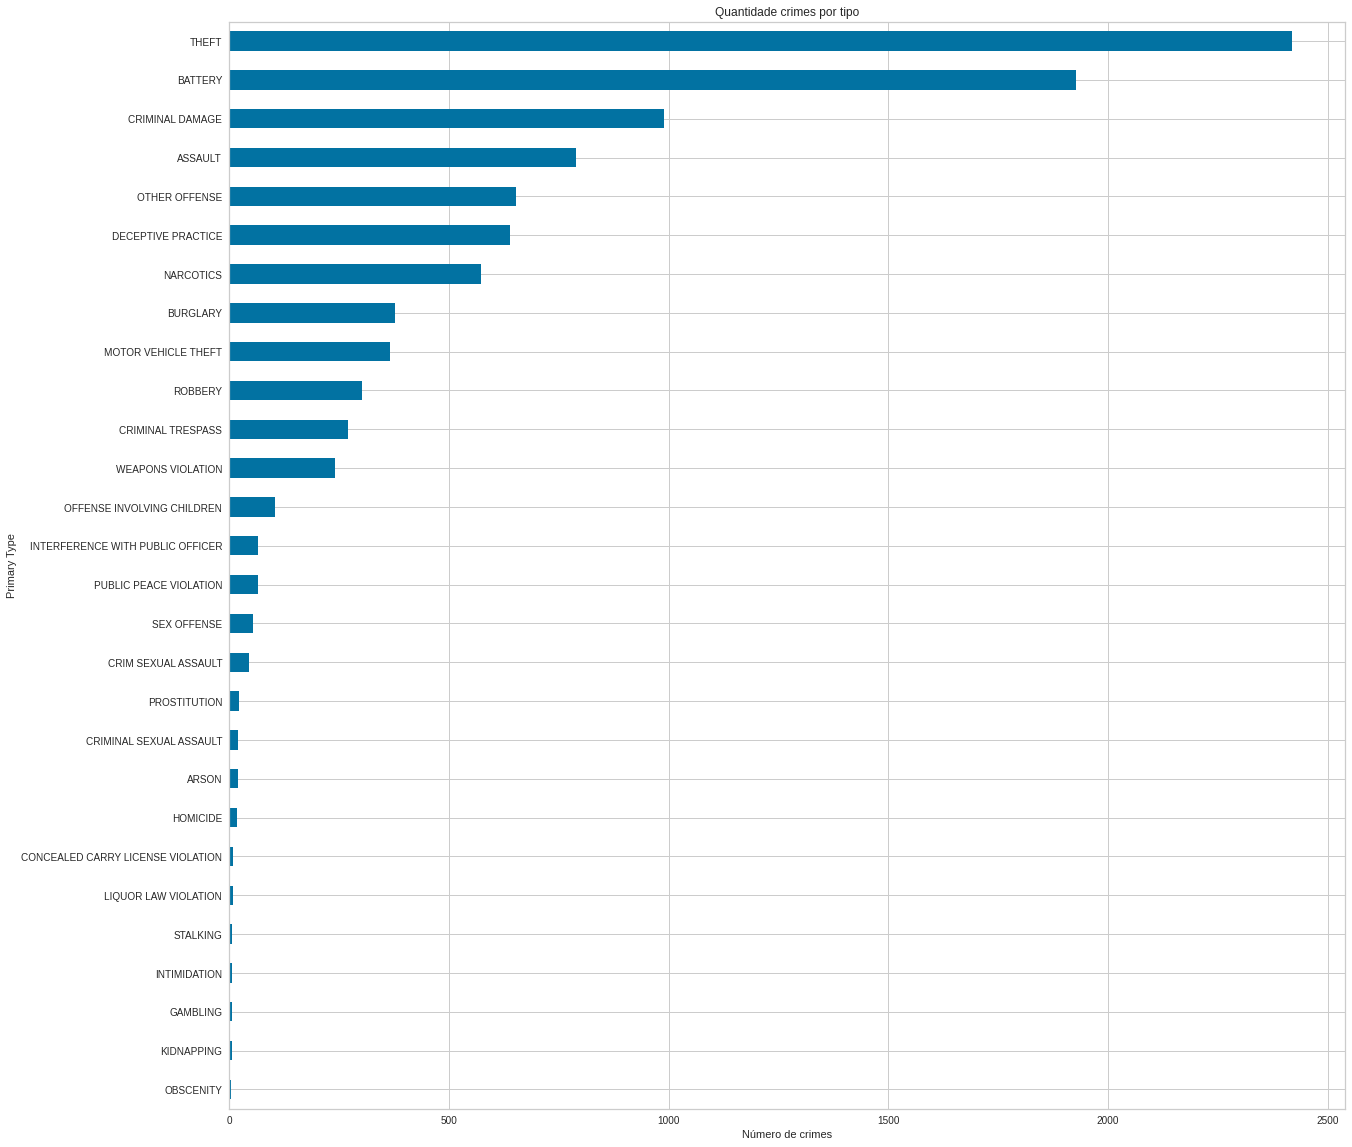

In [13]:
# Plot agrupando pela coluna Primary Type
plt.figure(figsize=(20, 20))
plt.title("Quantidade crimes por tipo")
plt.xlabel("Número de crimes")
plt.ylabel("Tipo do crime")

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

Podemos observar no plot acima que o número de crimes por tipo (Primary Type) está bastante desbalanciado. Prosseguir como a construção do modelo com os valures outliers pode ser prejudicial ao nosso modelo.<br>
Para melhorar nosso dataset, vamos agrupar as últimas 13 classes em "**Outros**".

In [16]:
# Resumimos a quantidade de tipos de crimes (Primary Type) ocorrido
all_classes = df.groupby([df['Primary Type']])['Block'].size().reset_index()
all_classes['Amount'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amount'], ascending=[False])
all_classes

,Primary Type,Amount
26,THEFT,2419
2,BATTERY,1927
6,CRIMINAL DAMAGE,989
1,ASSAULT,789
20,OTHER OFFENSE,653
9,DECEPTIVE PRACTICE,638
17,NARCOTICS,573
3,BURGLARY,377
16,MOTOR VEHICLE THEFT,365
23,ROBBERY,303


In [17]:
# Classes que serão agrupadas em 'Outros'
unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amount
24,SEX OFFENSE,54
5,CRIM SEXUAL ASSAULT,44
21,PROSTITUTION,22
7,CRIMINAL SEXUAL ASSAULT,20
0,ARSON,19
11,HOMICIDE,17
15,LIQUOR LAW VIOLATION,8
4,CONCEALED CARRY LICENSE VIOLATION,8
13,INTIMIDATION,7
25,STALKING,7


In [18]:
# Agrupamos as 13 classes em 'Outros'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

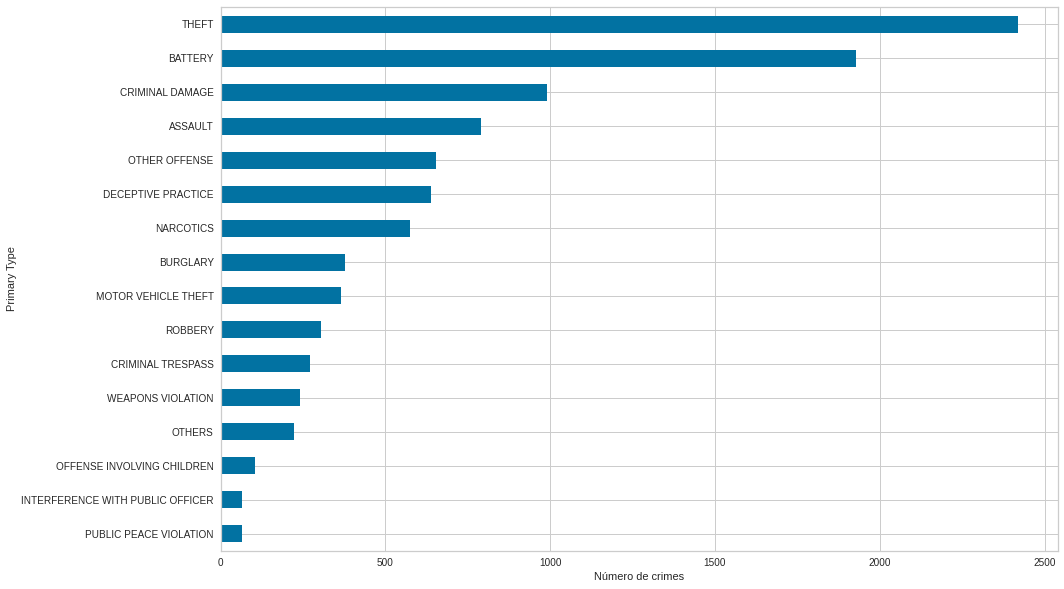

In [19]:
# Plotamos o gráfico novamente
plt.figure(figsize=(15,10))
plt.xlabel('Número de crimes')
plt.ylabel('Tipo de crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [21]:
# Agora ficamos com 16 classes
classes = df['Primary Type'].unique()
print(f"Número de classes: {len(classes)}")

Número de classes: 16


In [22]:
## Fazendo o Encoding da variáveis categóricas
df['Primary Type'] = pd.factorize(df['Primary Type'])[0]
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
# Agora selecionamos alguns recursos utilizando método de filtro
# Dividimos o dataframe em classes e recursos
x_fs = df.drop(['Primary Type'], axis=1)
y_fs = df['Primary Type']

### Correlação de Pearson

Em estatística descritiva, o coeficiente de correlação de Pearson, também chamado de "coeficiente de correlação produto-momento" ou simplesmente de "ρ de Pearson" mede o grau da correlação (e a direcção dessa correlação - se positiva ou negativa) entre duas variáveis de escala métrica (intervalar ou de rácio/razão.<br>
Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

ρ = 1 Significa uma correlação perfeita positiva entre as duas variáveis;<br>
ρ = -1 Significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui.<br>
ρ = 0 Significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma dependência não linear. Assim, o resultado ρ = 0 deve ser investigado por outros meios.<br><br>
Fonte: https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

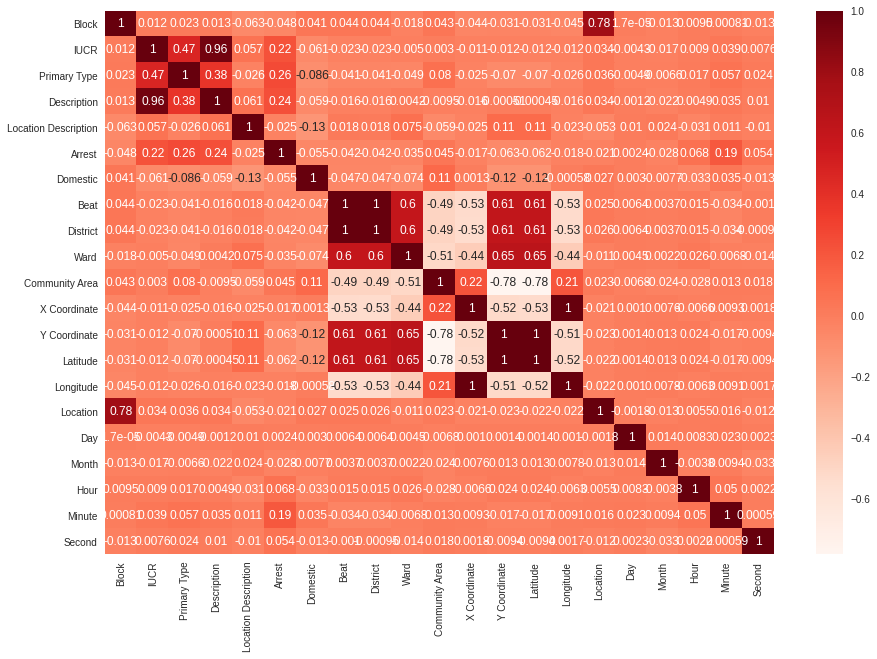

In [26]:
# Utilizamos correção de Pearson
plt.figure(figsize=(15, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Podemos verificar que a variável Description (descrição do crime), Arrest (se o infrator foi detido ou não) e IUCR (tipo de descriçao primário) tem uma boa correlação com a variável target (Primary Type)

In [30]:
# Correção com a variável de saida
cor_target = abs(cor['Primary Type'])

In [28]:
# Selecionamos os recursos altamente correlacionáveis
relevant_features = cor_target[cor_target > 0.1]
relevant_features

IUCR            0.466778
Primary Type    1.000000
Description     0.380078
Arrest          0.257691
Name: Primary Type, dtype: float64

In [31]:
# Features selecionadas
Features = ['IUCR', 'Description', 'Arrest']
print("Todas as features selecionadas: ", Features)

Todas as features selecionadas:  ['IUCR', 'Description', 'Arrest']


In [32]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
train, test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=3)

x_train = train[Features]
y_train = train[Target]
x_test = test[Features]
y_test = test[Target]

In [33]:
# Exibindo algumas informações
print("Atributos utilizados para treinamento: ", Features)
print("Variável target: ", Target)
print("Shape do dataset de treino: ", train.shape)
print("Shape do dataset de teste: ", test.shape)

Atributos utilizados para treinamento:  ['IUCR', 'Description', 'Arrest']
Variável target:  Primary Type
Shape do dataset de treino:  (8000, 22)
Shape do dataset de teste:  (2000, 22)


# Construindo os modelos de Machine Learning

## Random Forest
### Descrição
Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes ou a previsão média das árvores individuais.<br>

Fonte: https://en.wikipedia.org/wiki/Random_forest

In [34]:
# Definindo o modelo
rf_model = RandomForestClassifier(n_estimators=80, 
                                  min_samples_split=20, 
                                  bootstrap=True,
                                  max_depth=50,
                                  min_samples_leaf=25)

# Treinando o modelo
rf_model.fit(X=x_train, y=y_train)

# Prediction
result = rf_model.predict(x_test)

In [35]:
# Avaliando o modelo
rf_ac_sc = accuracy_score(y_test, result)
rf_rc_sc = recall_score(y_test, result, average='weighted')
rf_pr_sc = precision_score(y_test, result, average='weighted')
rf_f1_sc = f1_score(y_test, result, average='micro')

print("########### MÉTRICAS DO MODELO RANDOM FOREST ###########")
print(f"Accuracy:        {rf_ac_sc}")
print(f"Recall score:    {rf_rc_sc}")
print(f"Precision score: {rf_pr_sc}")
print(f"F1 Score:        {rf_f1_sc}")
print("########### CONFUSION MATRIX ##############")
print(confusion_matrix(y_test, result))

########### MÉTRICAS DO MODELO RANDOM FOREST ###########
Accuracy:        0.8885
Recall score:    0.8885
Precision score: 0.8987159157761387
F1 Score:        0.8885
########### CONFUSION MATRIX ##############
[[128   1   0   3   0   0   7   0   9   2   0   2   0   0   0   1]
 [  0 468   3   0   0   0   0   0   0   0   0   5   0   2   0   0]
 [  7   0 351  13   0   0   2   0   1   1   0   1   0   3   0   0]
 [  0   3   2 195   0   0   0   0   0   0   0   0   0   2   0   0]
 [  2   0   3   0  39   1   0   0   3   0   0   4   1   0   0   0]
 [  0   0   0   0   0  70   0   0   3   0   0   2   0   1   0   0]
 [  4   0   2   0   0   9  79   0   4   5   0   0   1   3   0   1]
 [  0   0   0   0   0   0   0  59   4   4   0   3   0   1   0   0]
 [  5   0   0   0   0   0   0   0 113   2   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0  49   0   0   4   0   0   0]
 [  8   0   0   7   0   0   0   0   5   1  30   2   0   0   0   1]
 [  7   1   0   0   0   0   1   0   3   2   0  29   0 

Relatório de classificação

                                  precision    recall  f1-score   support

                   OTHER OFFENSE       0.76      0.84      0.80       153
                           THEFT       0.99      0.98      0.98       478
                         BATTERY       0.95      0.93      0.94       379
                 CRIMINAL DAMAGE       0.87      0.97      0.92       202
                         ROBBERY       0.93      0.74      0.82        53
                        BURGLARY       0.88      0.92      0.90        76
              DECEPTIVE PRACTICE       0.85      0.73      0.79       108
             MOTOR VEHICLE THEFT       1.00      0.83      0.91        71
                       NARCOTICS       0.75      0.94      0.83       120
               CRIMINAL TRESPASS       0.74      0.83      0.78        59
               WEAPONS VIOLATION       1.00      0.56      0.71        54
                          OTHERS       0.53      0.67      0.59        43
         

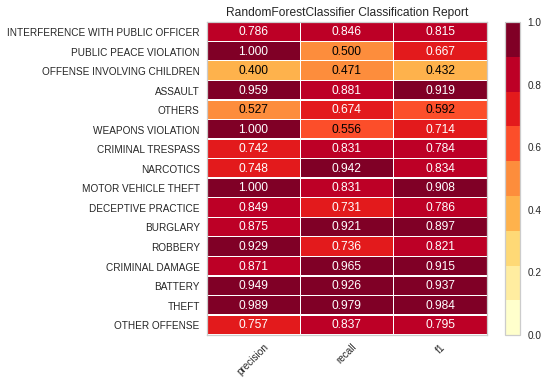

In [36]:
# Relatório de classificação
target_names = classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)
visualizer.score(x_test, y_test)

print("Relatório de classificação\n")
print(classification_report(y_test, result, target_names=target_names))
g = visualizer.poof()

## KNN - K-nearest-neighbors
### Descrição
k-vizinhos mais próximos é um método não paramétrico proposto por Thomas Cover usado para classificação e regressão. Nos dois casos, a entrada consiste nos k exemplos de treinamento mais próximos no espaço de recursos.<br>

Fonte: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [37]:
# Definindo o modelo
knn_model = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn_model.fit(X=x_train, y=y_train)

# Prediction
result = knn_model.predict(x_test)

In [38]:
# Avaliando o modelo
knn_ac_sc = accuracy_score(y_test, result)
knn_rc_sc = recall_score(y_test, result, average='weighted')
knn_pr_sc = precision_score(y_test, result, average='weighted')
knn_f1_sc = f1_score(y_test, result, average='micro')

print("########## MÉTRICAS DO MODELO K-NEAREST NEIGHBORS ############")
print(f"Accuracy: {knn_ac_sc}")
print(f"Recall score: {knn_rc_sc}")
print(f"Precision score: {knn_pr_sc}")
print(f"F1 score: {knn_f1_sc}")
print("########## MATRIX DE CONFUSÃO ############")
print(confusion_matrix(y_test, result))

########## MÉTRICAS DO MODELO K-NEAREST NEIGHBORS ############
Accuracy: 0.993
Recall score: 0.993
Precision score: 0.9929968721937226
F1 score: 0.993
########## MATRIX DE CONFUSÃO ############
[[153   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 478   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 378   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  53   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  76   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 116   0   1   2   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  54   0   0   0   0   0]
 [  1   0   0   1   0   0   0   1   0   0   0  40   0   0   0   0]
 [

############ Relatório de classificação ###############
                                  precision    recall  f1-score   support

                   OTHER OFFENSE       0.98      1.00      0.99       153
                           THEFT       1.00      1.00      1.00       478
                         BATTERY       1.00      1.00      1.00       379
                 CRIMINAL DAMAGE       1.00      1.00      1.00       202
                         ROBBERY       1.00      1.00      1.00        53
                        BURGLARY       1.00      1.00      1.00        76
              DECEPTIVE PRACTICE       0.99      1.00      1.00       108
             MOTOR VEHICLE THEFT       0.99      1.00      0.99        71
                       NARCOTICS       0.97      0.97      0.97       120
               CRIMINAL TRESPASS       1.00      1.00      1.00        59
               WEAPONS VIOLATION       0.98      1.00      0.99        54
                          OTHERS       0.95      0.93  

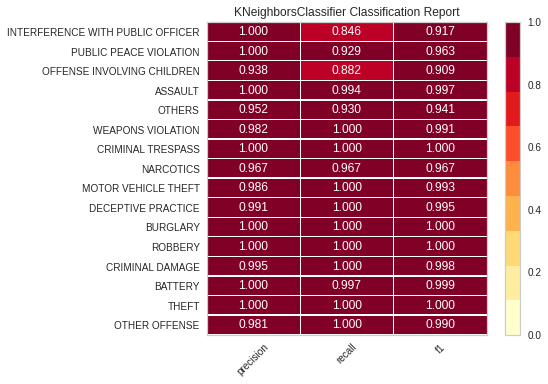

In [39]:
# Classification report
target_names = classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)
visualizer.score(X=x_test, y=y_test)

print("############ Relatório de classificação ###############")
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()

## Multilayer Perceptron (MLP)
### Descrição
A perceptron multicamadas é uma rede neural semelhante à perceptron, mas com mais de uma camada de neurônios em alimentação direta. Tal tipo de rede é composta por camadas de neurônios ligadas entre si por sinapses com pesos.<br>

Fonte: https://pt.wikipedia.org/wiki/Perceptron_multicamadas

In [41]:
# Definindo o modelo
mlp_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, ), verbose= 1, random_state=1, max_iter=1000)

# Treinando o modelo
mlp_model.fit(X=x_train, y=y_train)

# Prediction
result = mlp_model.predict(x_test)

Iteration 1, loss = 5.65622970
Iteration 2, loss = 2.93500832
Iteration 3, loss = 2.51312867
Iteration 4, loss = 2.39960585
Iteration 5, loss = 2.28966638
Iteration 6, loss = 2.17200971
Iteration 7, loss = 2.07141216
Iteration 8, loss = 1.98464089
Iteration 9, loss = 1.92650861
Iteration 10, loss = 1.89131067
Iteration 11, loss = 1.84783488
Iteration 12, loss = 1.82341484
Iteration 13, loss = 1.79836407
Iteration 14, loss = 1.77988470
Iteration 15, loss = 1.76151054
Iteration 16, loss = 1.74102131
Iteration 17, loss = 1.72219992
Iteration 18, loss = 1.70536373
Iteration 19, loss = 1.69103821
Iteration 20, loss = 1.68031190
Iteration 21, loss = 1.66145936
Iteration 22, loss = 1.65155119
Iteration 23, loss = 1.63293157
Iteration 24, loss = 1.62465998
Iteration 25, loss = 1.61270734
Iteration 26, loss = 1.59947525
Iteration 27, loss = 1.59140422
Iteration 28, loss = 1.57855441
Iteration 29, loss = 1.57170256
Iteration 30, loss = 1.56406385
Iteration 31, loss = 1.55335121
Iteration 32, los

Iteration 256, loss = 1.00418532
Iteration 257, loss = 1.00330382
Iteration 258, loss = 1.00512483
Iteration 259, loss = 1.00721620
Iteration 260, loss = 0.99741846
Iteration 261, loss = 1.00426560
Iteration 262, loss = 1.00027769
Iteration 263, loss = 1.00051321
Iteration 264, loss = 1.00241955
Iteration 265, loss = 0.99958168
Iteration 266, loss = 0.99442261
Iteration 267, loss = 1.00114718
Iteration 268, loss = 0.99915927
Iteration 269, loss = 1.00329886
Iteration 270, loss = 0.99511350
Iteration 271, loss = 0.99481729
Iteration 272, loss = 1.00152293
Iteration 273, loss = 0.99663140
Iteration 274, loss = 0.99266973
Iteration 275, loss = 0.99041506
Iteration 276, loss = 0.98814726
Iteration 277, loss = 0.99341453
Iteration 278, loss = 0.99502236
Iteration 279, loss = 0.99492872
Iteration 280, loss = 0.98893060
Iteration 281, loss = 0.99305977
Iteration 282, loss = 0.98680310
Iteration 283, loss = 0.98640093
Iteration 284, loss = 0.99100090
Iteration 285, loss = 0.98783731
Iteration 

Interessante observar que o **MLPClassifier** do pacote **neural_network** do **Sklearn** implementa a técnica de regularização <a href='https://pt.wikipedia.org/wiki/Perceptron_multicamadas'>Early Stopping</a>. Mesmo definindo 1000 epochs para o treinamento, ao detectar que a loss function não está tendo melhorias, o modelo para de treinar automaticamente, a fim de evitar o <a href='https://pt.wikipedia.org/wiki/Sobreajuste'>overfitting</a>.

In [42]:
# Avaliando o modelo
mlp_ac_sc = accuracy_score(y_test, result)
mlp_rc_sc = recall_score(y_test, result, average='weighted')
mlp_pc_sc = precision_score(y_test, result, average='weighted')
mlp_f1_sc = f1_score(y_test, result, average='micro')

print("######### MÉTRICAS DO MULTILAYER PERCEPTRON (MLP) #########")
print(f"Acurracy: {mlp_ac_sc}")
print(f"Recall score: {mlp_rc_sc}")
print(f"Precision score: {mlp_pc_sc}")
print(f"F1 Score: {mlp_f1_sc}")
print("######### CONFUSION MATRIX #########")
print(confusion_matrix(y_test, result))

######### MÉTRICAS DO MULTILAYER PERCEPTRON (MLP) #########
Acurracy: 0.7055
Recall score: 0.7055
Precision score: 0.7586837205463152
F1 Score: 0.7055
######### CONFUSION MATRIX #########
[[ 35   0  53   0   0   0  28   2  23  10   0   1   0   0   0   1]
 [  2 368  80   0   0   0  25   0   0   0   3   0   0   0   0   0]
 [  1  50 312   0   0   0   6   0   7   0   0   3   0   0   0   0]
 [  0   0  12 188   0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   0   1   0  14   0  28   0   7   0   0   3   0   0   0   0]
 [  0   0   0   0   0  41  34   0   1   0   0   0   0   0   0   0]
 [  3  17   3   0   0   0  69   9   6   0   0   0   0   0   0   1]
 [  3   0   0   0   0   0   5  59   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 112   0   1   0   0   0   0   7]
 [  0   0   0   0   0   0  21   0   3  35   0   0   0   0   0   0]
 [  0   1   7   0   0   0   7   0   6   0  30   2   0   0   0   1]
 [  5   0   9   0   0   0   9   0   6   0   0  14   0   0   0   0]
 [  0   

############ Relatório de classificação ###############
                                  precision    recall  f1-score   support

                   OTHER OFFENSE       0.70      0.23      0.34       153
                           THEFT       0.84      0.77      0.81       478
                         BATTERY       0.62      0.82      0.71       379
                 CRIMINAL DAMAGE       1.00      0.93      0.96       202
                         ROBBERY       1.00      0.26      0.42        53
                        BURGLARY       1.00      0.54      0.70        76
              DECEPTIVE PRACTICE       0.28      0.64      0.39       108
             MOTOR VEHICLE THEFT       0.84      0.83      0.84        71
                       NARCOTICS       0.58      0.93      0.72       120
               CRIMINAL TRESPASS       0.78      0.59      0.67        59
               WEAPONS VIOLATION       0.88      0.56      0.68        54
                          OTHERS       0.50      0.33  

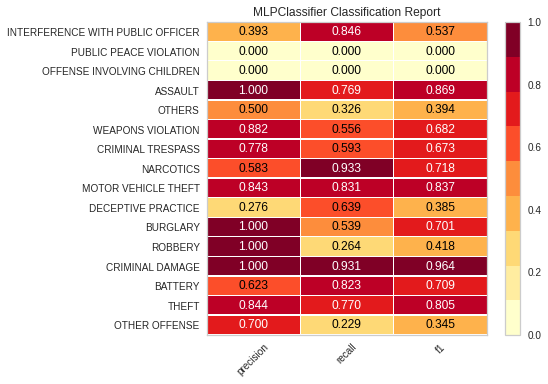

In [43]:
# Classification report
target_names = classes
visualizer = ClassificationReport(mlp_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)
visualizer.score(X=x_test, y=y_test)

print("############ Relatório de classificação ###############")
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()

## Ensemble Voting Model

In [46]:
# Combinando 3 modelos para criar um Ensamble Model
em = VotingClassifier(estimators=[('knn', knn_model), 
                                  ('rf', rf_model), 
                                  ('nn', knn_model)], 
                                  weights=[1,1,1],
                                  flatten_transform=True)

# Treinando o modelo
em = em.fit(X=x_test, y=y_test)   

# Prediction
result = em.predict(x_test[Features])

In [47]:
# Avaliação do Modelo
em_ac_sc = accuracy_score(y_test, result)
em_rc_sc = recall_score(y_test, result, average="weighted")
em_pr_sc = precision_score(y_test, result, average="weighted")
em_f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("============= Ensemble Voting =============")
print("Accuracy    : ", em_ac_sc)
print("Recall      : ", em_rc_sc)
print("Precision   : ", em_pr_sc)
print("F1 Score    : ", em_f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

============= Ensemble Voting =============
Accuracy    :  0.9865
Recall      :  0.9865
Precision   :  0.9864792817406728
F1 Score    :  0.9865
Confusion Matrix: 

[[152   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0 478   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1 378   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  52   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0  76   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 107   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 117   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0  52   0   0   0   0   1]
 [  1   1   1   0   2   0   0   1   2   0   0  34   0   0   1   0]
 [  0   0   0   0   0   0   0   

================= Relatório de Classificação =================

                                  precision    recall  f1-score   support

                   OTHER OFFENSE       0.98      0.99      0.99       153
                           THEFT       1.00      1.00      1.00       478
                         BATTERY       1.00      1.00      1.00       379
                 CRIMINAL DAMAGE       1.00      1.00      1.00       202
                         ROBBERY       0.95      0.98      0.96        53
                        BURGLARY       1.00      1.00      1.00        76
              DECEPTIVE PRACTICE       0.99      0.99      0.99       108
             MOTOR VEHICLE THEFT       0.96      0.99      0.97        71
                       NARCOTICS       0.96      0.97      0.97       120
               CRIMINAL TRESPASS       1.00      1.00      1.00        59
               WEAPONS VIOLATION       0.98      0.96      0.97        54
                          OTHERS       0.89    

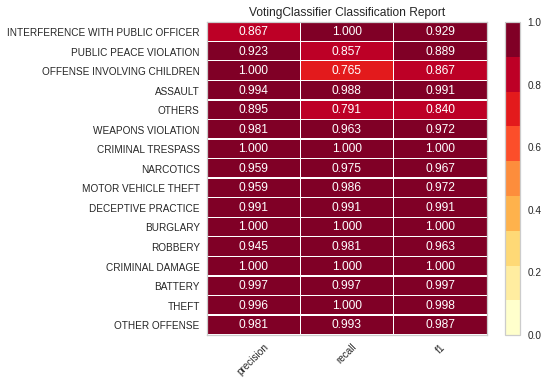

In [48]:
# Relatório de Classificação
target_names = classes
visualizer = ClassificationReport(em, classes=target_names)
visualizer.fit(X=x_train, y=y_train)     
visualizer.score(X=x_test, y=y_test)      

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()            